In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cwd = os.getcwd()
root_dir = os.path.abspath(os.path.join(cwd, os.pardir))
root_dir

'/home/egianuzzi/Documentos/git/AstroBould'

In [103]:
def read_outfile(name, nboulders=0, coord=False):
    full_name = os.path.join(root_dir, name)
    if not os.path.isfile(full_name):
        print("El archivo %s no existe"%os.path.basename(full_name))
        return
    if coord:
        df = pd.read_csv(full_name, delimiter='\s+', header=None,
                         names=["idx",
                                "merged_to",
                                "t",
                                "theta", "omega", 
                                "x", "y",
                                "vx", "vy",
                                "mass", "radius"])
        df.name = name.split(".")[0]
        df.nt = df.idx.nunique()
        df.nb = nboulders
        df.np = df.nt - nboulders
        df["r"] = np.sqrt(df["x"]**2 + df["y"]**2)
        df["v"] = np.sqrt(df["vx"]**2 + df["vy"]**2)
    else:
        df = pd.read_csv(full_name, delimiter='\s+', header=None,
                         names=["idx",
                                "merged_to",
                                "t",
                                "theta", "omega", 
                                "a", "e", "M", "w", "mmr",
                                "amax", "amin", "emax", "emin",
                                "mass", "radius",
                                "dist"]) # Asteroid
        df.name = name.split(".")[0]
        df.tmax = df.t.iloc[-1]
    return df

In [104]:
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection


def circles_with_radius(ax, x, y, radii, **kwargs):
    """
    Plot many circles with radius in *data units* efficiently using PatchCollection.
    """
    patches = [Circle((cx, cy), r) for cx, cy, r in zip(x, y, radii)]
    collection = PatchCollection(patches, **kwargs)
    ax.add_collection(collection)
    return collection

In [117]:
coord = True
data = read_outfile("salida.out", coord=coord)
data

,idx,merged_to,t,theta,omega,x,y,vx,vy,mass,radius,r,v
0,-1,-1,0.0,0.000000,21.542347,-7.220385,-9.314644,66.151948,-73.955915,7.000000e+18,133.871129,11.785438,99.224784
1,0,-1,0.0,0.054831,21.542347,-7.349256,-9.314644,66.151948,-76.732102,6.993007e+18,129.000000,11.864828,101.310886
2,1,-1,0.0,0.000000,21.542347,121.650744,-9.314644,66.151948,2702.230682,6.993007e+15,5.000000,122.006828,2703.040277
3,2,-1,0.0,0.000000,21.542347,221.116122,310.093024,-2204.408141,2386.533533,2.100000e+17,1.500000,380.854333,3248.839417
4,3,-1,0.0,0.000000,21.542347,586.901382,11.853002,-19.703835,2359.909479,7.000000e+15,2.500000,587.021060,2359.991736
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8329,2,-1,99900.0,0.103333,21.327326,235.642176,-544.164565,2024.465575,385.207043,2.100000e+17,1.500000,592.994358,2060.787551
8330,-1,-1,100000.0,0.041274,21.327574,6.596815,-7.438348,76.082273,76.878340,7.000000e+18,133.871129,9.942182,108.160951
8331,0,-1,100000.0,0.096105,21.327574,6.688724,-7.528684,78.008907,78.838539,6.993007e+18,129.000000,10.070755,110.909444
8332,1,-1,100000.0,0.041274,21.327574,-85.312324,82.897017,-1850.551879,-1883.320590,6.993007e+15,5.000000,118.954226,2640.348216


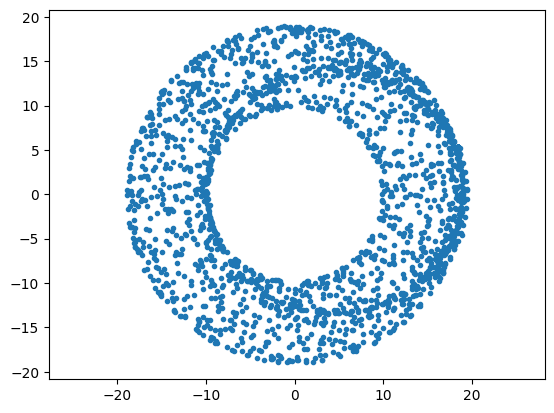

In [118]:
this = data.idx == -1
if coord:
    plt.plot(data.x.loc[this], data.y.loc[this], ".")
    plt.axis("equal")

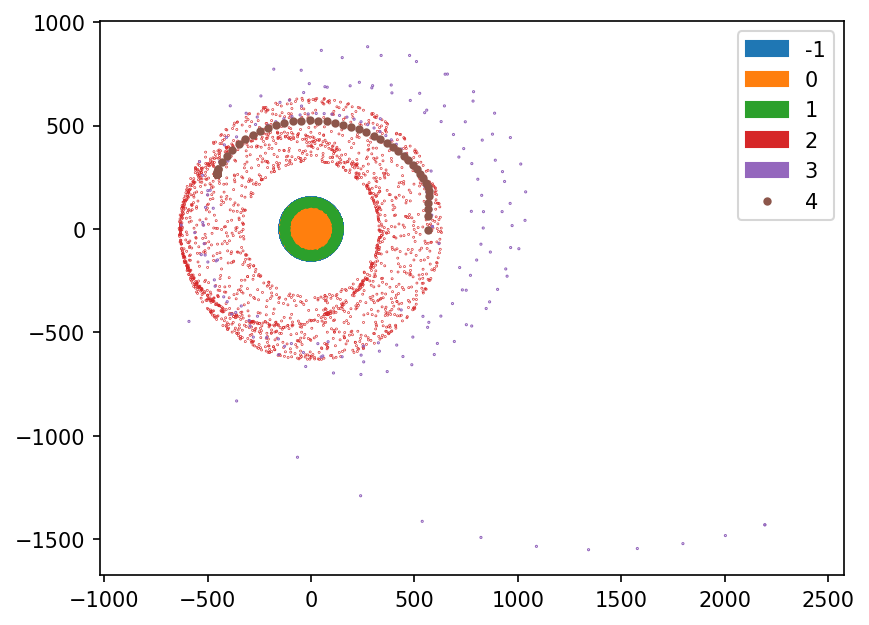

In [119]:
ntot = data.idx.nunique()
idsorted = sorted(data.idx.unique())
plt.figure(dpi=150)
ax = plt.gca()
if coord:
    # data[["x", "y", "vx", "vy"]] = data[["x", "y", "vx", "vy"]].values - np.repeat(data[["x", "y", "vx", "vy"]].values[::ntot], ntot, axis=0)
    
    for i in range(ntot):
        this = data.idx == idsorted[i]
        if data.radius.loc[this].iloc[0] > 0.0:
            # Initial condition
            circ = Circle((data.x.loc[this].iloc[0], data.y.loc[this].iloc[0]), data.radius.loc[this].iloc[0],
                           transform=ax.transData, label=str(idsorted[i]), facecolor=f"C{i}", edgecolor=f"C{i}")
            ax.add_patch(circ)
            circles_with_radius(ax, data.x.loc[this], data.y.loc[this], data.radius.loc[this], facecolor="none", edgecolor=f"C{i}")
        else:
            plt.plot(data.x.loc[this], data.y.loc[this], ".", label=idsorted[i], color=f"C{i}")
    plt.axis("equal")
else:
    for i in range(ntot):
        this = data.idx == idsorted[i]
        # plt.plot(data.t.loc[this], data.a.loc[this], ".", label=idsorted[i])
        # plt.plot(data.a.loc[this], data.e.loc[this], ".", label=idsorted[i])
        plt.plot(data.t.loc[this], data.mmr.loc[this], ".", label=idsorted[i])
    plt.semilogx()
plt.legend()
plt.show()

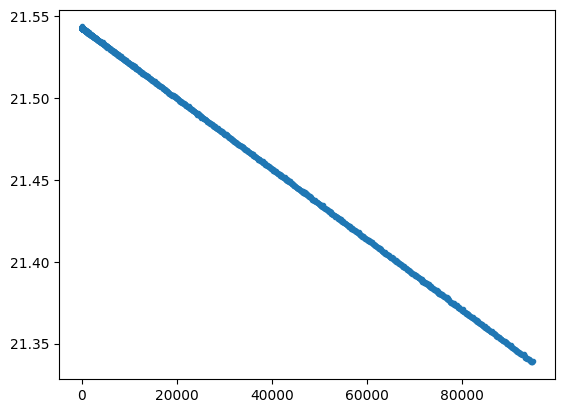

In [108]:
for i in range(ntot):
    # plt.plot(data.t, data.theta / np.pi *180, ".")
    plt.plot(data.t, data.omega, ".")
# plt.semilogx()